# MNIST dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

# Defining training and testing smaples
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalising the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

2022-03-02 01:52:54.545989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/root/lib:
2022-03-02 01:52:54.546055: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


As usual, let's have a quick look at our dataset.

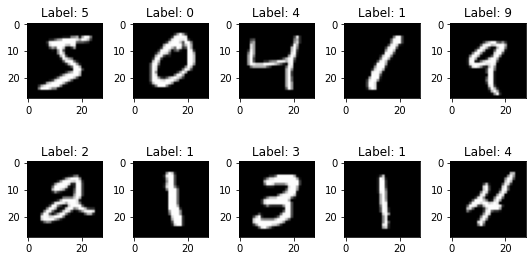

(28, 28)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_row = 2
num_col = 5
# Plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

print(x_train[1].shape)

We now define our neural network: 
- A sequence of layers which take as input 28x28 images which is flattened to a 1-dimensional array of size 784.
- A dense intermediate layer with a ReLU activation
- A dropout rate of 0.2
- Finally, a dense output layer of size 10 (for each digit)

In [3]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

2022-03-02 01:53:02.020119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/root/lib:
2022-03-02 01:53:02.025404: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-02 01:53:02.025817: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5d449486482b): /proc/driver/nvidia/version does not exist
2022-03-02 01:53:02.028900: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We test the prediction of our (untrained) model on the first element of our training sample.

In [4]:
predictions = model1(x_train[:1]).numpy()
print( predictions )

[[-0.05922724  0.31187192  0.10792677 -0.22741099  0.31437153  0.02142578
  -0.5820463  -0.5978869   0.28751564  0.47473925]]


The `tf.nn.softmax` function converts these logits to "probabilities" for each class.

In [5]:
print( tf.nn.softmax(predictions).numpy() )

[[0.08841791 0.12814645 0.10450435 0.07473069 0.12846717 0.09584456
  0.05241829 0.0515945  0.12506299 0.15081307]]


We define our *loss* function and use it on our (untrained) model. This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print (loss_fn(y_train[:1], predictions).numpy())


2.3450274


Let us now compile, using the ADAM optimiser and an accuracy metric, and train (fit) our model for 5 epochs.

In [7]:
model1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)



Epoch 1/5


2022-03-02 01:53:02.288051: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.2943 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1431 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1053 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9732
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0742 - accuracy: 0.9764


We can now evaluate the accuracy of the model for our testing dataset.

The image classifier is now trained to ~98% accuracy on this dataset.

Try increasing the number of epochs and see if it has any effect.

In [8]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0721 - accuracy: 0.9778 - 479ms/epoch - 2ms/step


[0.07207038998603821, 0.9778000116348267]

One can obtain a *probability model* by wrapping the model around a softmax function.

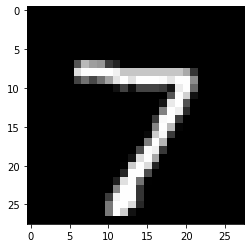

Predicted number is 7


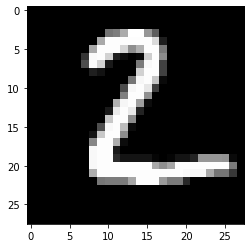

Predicted number is 2


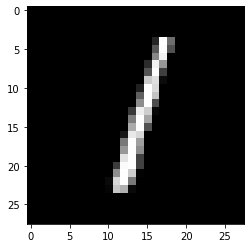

Predicted number is 1


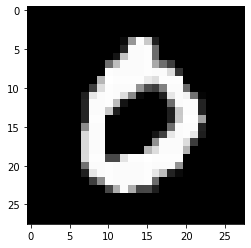

Predicted number is 0


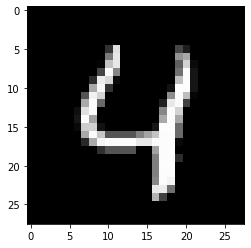

Predicted number is 4


In [9]:
probability_model = tf.keras.Sequential([
  model1,
  tf.keras.layers.Softmax()
])

for i in range(0,5):
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.imshow(x_test[i], cmap='gray')
  plt.show()
  mod_output = probability_model(x_test[i:i+1])
  print("Predicted number is", np.argmax(mod_output))


This last snippet allows comparing the prediction with the actual value

In [10]:
for i, p in enumerate(model1.predict(x_test)):
  print (y_test[i], np.argmax(p), y_test[i] == np.argmax(p))
  if i > 20: break

7 7 True
2 2 True
1 1 True
0 0 True
4 4 True
1 1 True
4 4 True
9 9 True
5 5 True
9 9 True
0 0 True
6 6 True
9 9 True
0 0 True
1 1 True
5 5 True
9 9 True
7 7 True
3 3 True
4 4 True
9 9 True
6 6 True



We can also train, evaluate and fit a new model `model2` with different settings for comparison.

Have fun playing with the parameters.


In [11]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=5)

model2.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5


2022-03-02 01:53:28.150871: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.2897 - accuracy: 0.9165
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1365 - accuracy: 0.9600
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1031 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0821 - accuracy: 0.9744
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0715 - accuracy: 0.9778
313/313 - 0s - loss: 0.0761 - accuracy: 0.9752 - 498ms/epoch - 2ms/step


[0.07613910734653473, 0.9751999974250793]